### Descriptive Modeling with ALS CSV Data

#### Here, I will demonstrate the following using the ALS data...

#### - Data cleaning
#### - Application of a standard scaler to the data
#### - I will create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster
#### - I'll then choose an optimal plot number of clusters for K-means and provide a justification for that choice
#### - I'll then fit a K-means model to the data with the optimal number of clusters that I chose
#### - Next, I will fit a PCA transformation with two features to the scaled data
#### - Finally, I will make a scatterplot the PCA transformed data, coloring each point by its cluster value before summarizing the results and providing a conclusion


In [4]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Removing any data that isn't relevant to the patient’s ALS condition
# I'm removing Subject ID and ID, as they are the only variables that we know we can safely remove since they're not 
# related to the condition, but as identifications of the patients themselves

df = pd.read_csv('als_data.csv')
df.drop(['ID', 'SubjectID'], axis=1, inplace=True)

In [6]:
# Apply a standard scalar to the data
# First creating the scaler and then transforming the data with the scaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

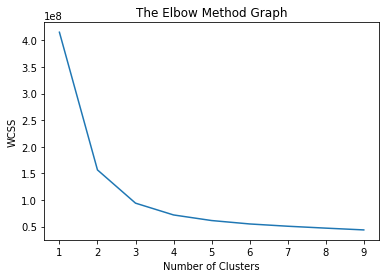

In [7]:
# Creating a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
# Elbow Score vs Number of Clusters and plotting that

x = df.iloc[:, :-1].values
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Getting the Silhouette Score:

silhouette_score(x, kmeans.labels_)

0.25010980279568934

#### This score alone at .25 is nowhere close to 1, which would indicate a great fit, but it is in line with the score we'd expect to see with 7 clusters. Further down, I will show and explain why 7 clusters appears to be the ideal number of clusters for this data. While practicing this, I did run the information a couple of times, and during one instance it appeared that 6 clusters was also ideal. That only happened once though, and I was not able to reproduce that to confirm if it may have been User Error on my part. 

In [9]:
# Getting top 15 Silhouette Scores per cluster

kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(x) for k in range(1, 17)]
silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_per_k[1:]]
silhouette_scores

[0.5646632528053799,
 0.46074356149396267,
 0.37737519125789876,
 0.3195855542196423,
 0.2889760296163366,
 0.26945263584022844,
 0.24930860538143979,
 0.25426482722611937,
 0.24476990819973662,
 0.2322580289776888,
 0.2321876585884683,
 0.22128576422194202,
 0.2209874920724774,
 0.20978905671494233,
 0.21067565164875351]

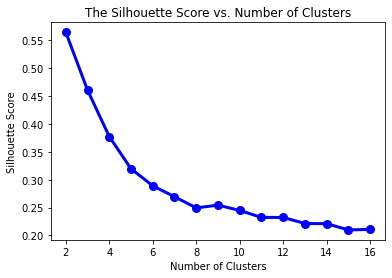

In [10]:
# Plotting the Silhouette Scores

plt.plot(range(2, 17), silhouette_scores, "bo-", color='blue', linewidth=3, markersize=8, label='Silhouette Curve')
plt.title('The Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### Based on the plot above, and recognizing that the first point represents 2 clusters, we can see that we have our clearest 'elbow' at 7 clusters.

#### The way this plot curves, we see that fewer than 7 clusters leaves too many data points clustered rather loosely, while going past 7 clusters is essentially putting us in a position of getting diminishing returns where additional clusters do not add enough insight to garner additional clusters

In [11]:
# Fitting a K-means model to the data with the optimal number of clusters chosen above

KMM = KMeans(n_clusters=7, random_state=42, n_init=10)
KMM.fit(scaled)

KMeans(n_clusters=7, random_state=42)

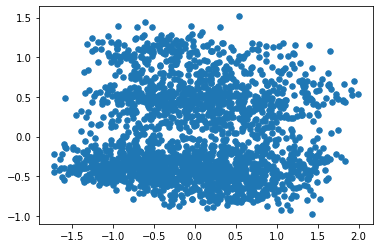

In [12]:
# Fitting a PCA transformation with two features to the scaled data

# Scaling
pca = PCA(n_components=2)
scaledPCA = pca.fit_transform(scaled)
# Plotting
plt.scatter(scaledPCA[:, 0], scaledPCA[:, 1], s=30, cmap=plt.cm.Paired)

#### The above plot shows our PCA transformation with two features for our scaled data. It should be noted that with PCA, we do not expect to see the 7 clusters that I have already referenced/found above. We do see the points coming together into two large clusters. PCA serves the purpose of transforming high dimensionality in data to lower dimensionality while losing as little information as possible. In the next step, I will take the above scatterplot and divide it out into those 7 clusters aleady mentioned!

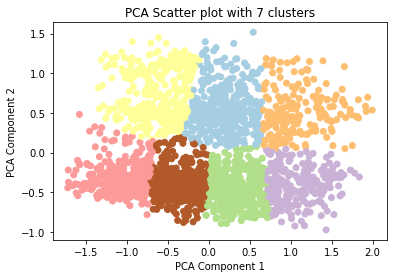

In [13]:
# Making a scatterplot of the PCA transformed data coloring each point by its cluster value

ktest=KMeans(n_clusters=7)
ktest.fit(scaledPCA)
y_pred = ktest.predict(scaledPCA)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter plot with 7 clusters')
plt.scatter(scaledPCA[:, 0], scaledPCA[:, 1], c=y_pred, cmap=plt.cm.Paired)

### A summary and conclusion of the results:

#### Based on the clusters on the plot above, we see that the data for each variable is closely associated with all of the other data points within each variable. Without any expertise in ALS, I can glean that because the clusters are so close, without overlapping, that any of these different variables taken on their own could have the ability to indicate the presence of ALS in a patient. Without being an  authority in the field of ALS/ALS diagnosis, etc., I would be hesitant to take this conclusion to then start removing variables. Even if closely related, they could all interact with each other in ways unknown to someone without more domain expertise.
